In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Import Data
We first import some data

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [3]:
!pip install yellowbrick



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.1 MB/s eta 0:00:00:00:01


In [4]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [8]:
import boto3
import pandas as pd
import io

s3 = boto3.client('s3')
bucket_name = 'my-sds-project-files'
file_name = 'Sample - Superstore.csv'

# Get the CSV file from S3
obj = s3.get_object(Bucket=bucket_name, Key=file_name)
data = obj['Body'].read()

# Create the DataFrame
df = pd.read_csv(io.BytesIO(data), encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
pd.set_option('display.max_columns', 50)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


In [11]:
df.shape

(9994, 21)

In [12]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [16]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
df_num = df.filter(['Sales','Quantity', 'Discount', 'Profit'], axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'


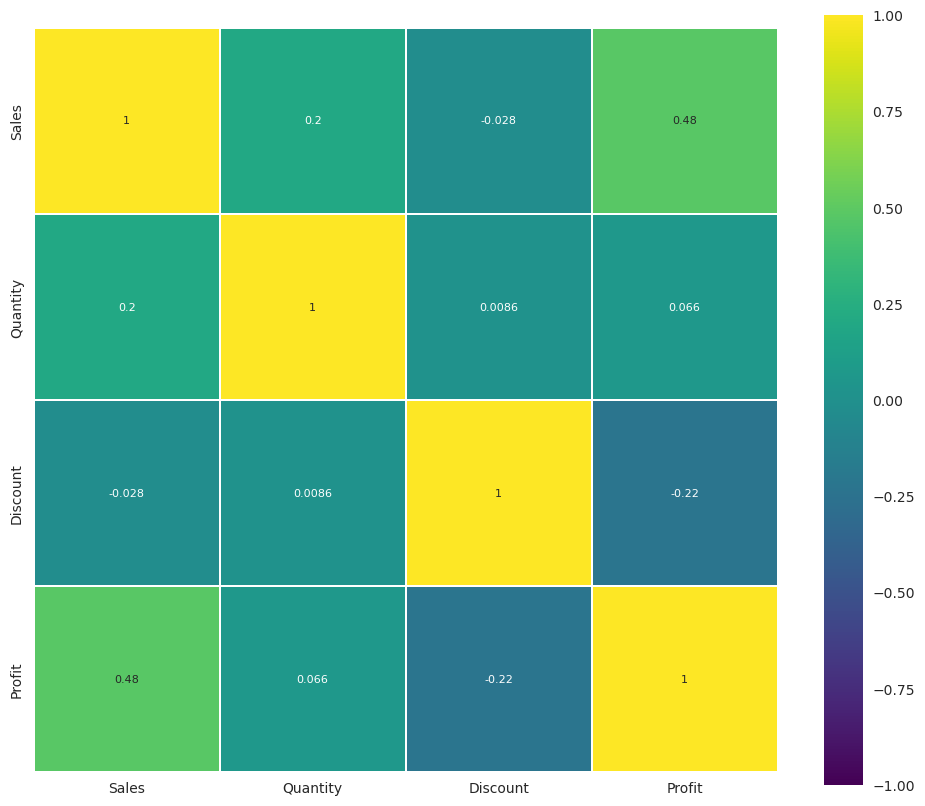

In [23]:

# prompt: graph correlation of all numerical variables
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

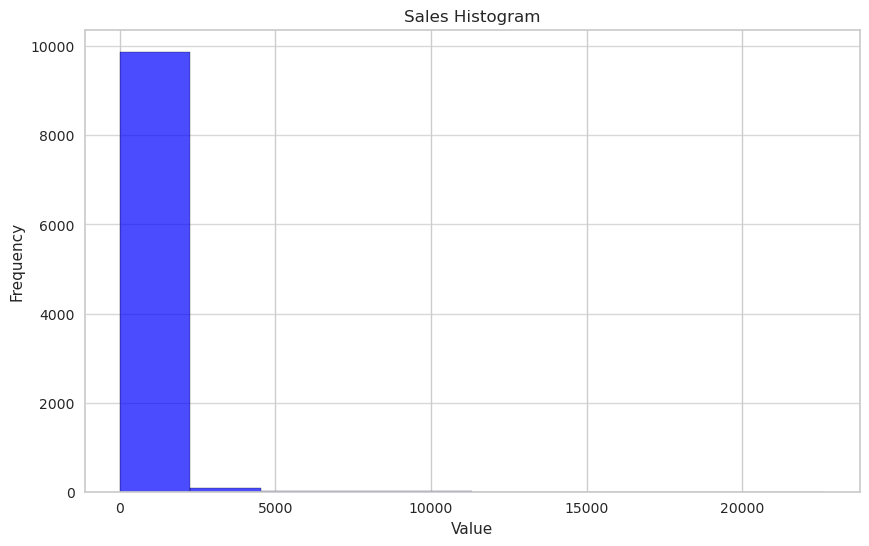

In [24]:

plt.figure(figsize=(10, 6))
plt.hist(df_num['Sales'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Sales Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

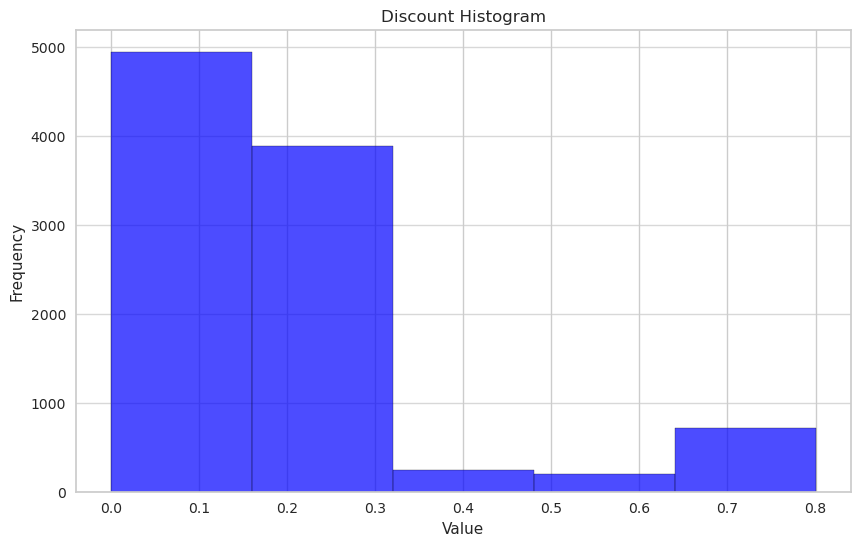

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Discount'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Discount Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

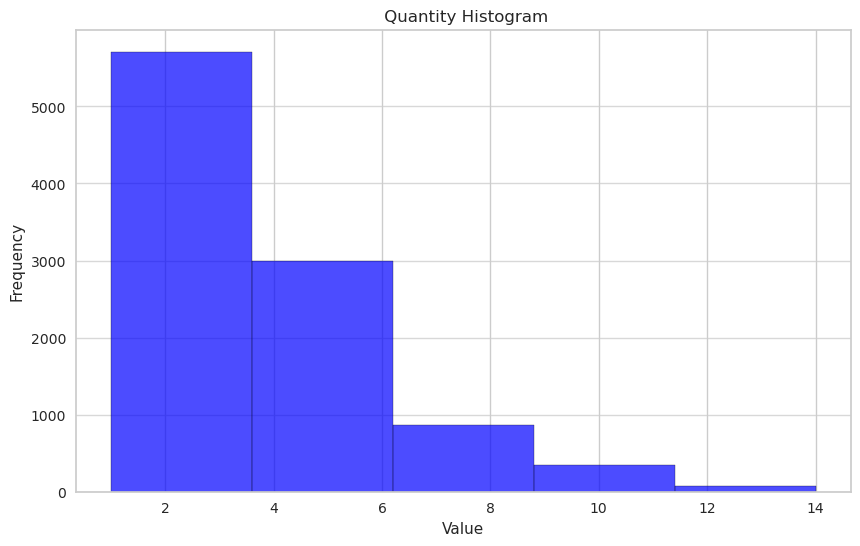

In [26]:

plt.figure(figsize=(10, 6))
plt.hist(df_num['Quantity'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title(' Quantity Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

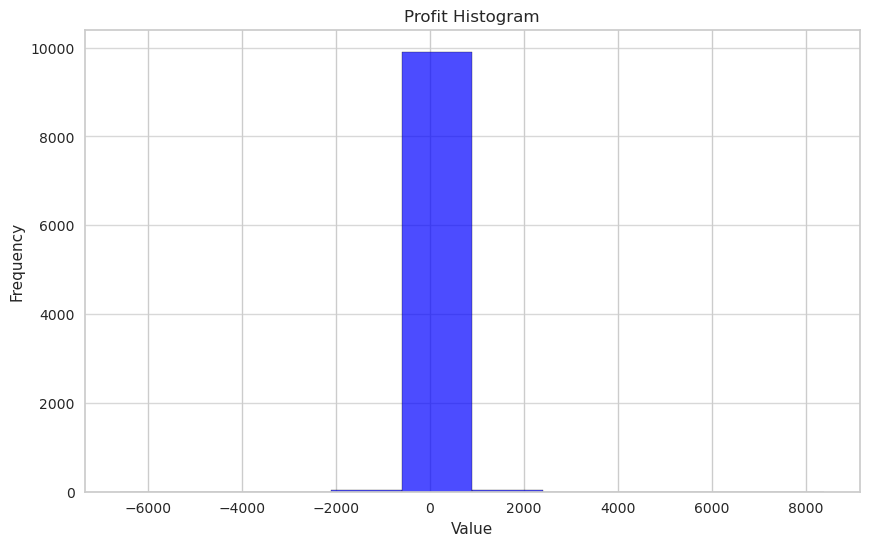

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

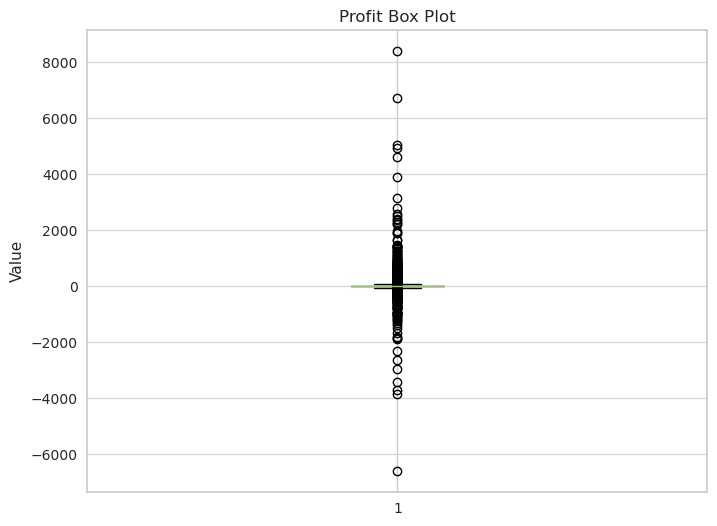

In [28]:

plt.figure(figsize=(8, 6))
plt.boxplot(df_num['Profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

In [29]:
df.describe(include="object").T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [30]:
df['Country'].unique()

array(['United States'], dtype=object)

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [33]:
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [34]:
df['Customer ID'].nunique(), df['Customer Name'].nunique()

(793, 793)

In [35]:
df['Postal Code'].nunique(), df['City'].nunique()

(631, 531)

In [36]:
df = df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [37]:
negative_profit_customers = df[df['Profit'] < 0]

In [38]:
negative_profit_summary = negative_profit_customers.groupby('Customer ID').agg(
    total_negative_profit=('Profit', 'sum'),
    total_orders=('Order ID', 'count'),
    average_order_value=('Sales', 'mean'),
    most_common_category=('Category', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

In [47]:
print(negative_profit_summary)

    Customer ID  total_negative_profit  total_orders  average_order_value  \
0      AA-10315              -786.0144             1          3930.072000   
1      AA-10645               -20.0355             2           126.420000   
2      AB-10015                -2.5248             1            12.624000   
3      AB-10060               -73.0548             1           449.568000   
4      AB-10105              -402.4772             7           111.917286   
..          ...                    ...           ...                  ...   
633    VW-21775             -1510.1424             5           715.513600   
634    WB-21850              -345.4171            10           135.970400   
635    XP-21865               -27.2922             1           167.952000   
636    YS-21880               -38.2116             1           436.704000   
637    ZC-21910             -2130.2964            13           191.999308   

    most_common_category  
0        Office Supplies  
1              Furnit

In [48]:
# Sort by total_negative_profit in descending order and display the result
negative_profit_summary_sorted = negative_profit_summary.sort_values(by='total_negative_profit', ascending=True)
print(negative_profit_summary_sorted)


    Customer ID  total_negative_profit  total_orders  average_order_value  \
138    CS-12505             -6904.3700             2            2478.2865   
248    GT-14635             -4187.1078             2            4495.8720   
367    LF-17185             -3805.5490             7             382.9560   
574    SR-20425             -3467.1258             5             549.5890   
257    HG-14965             -2998.8345             5             436.1052   
..          ...                    ...           ...                  ...   
549    SF-20065                -1.0196             1              71.3720   
472    PC-18745                -0.9900             1               1.1880   
527    RS-19765                -0.9452             1               0.5560   
7      AB-10255                -0.6435             1               2.9700   
310    JM-15580                -0.6048             1               3.0240   

    most_common_category  
138      Office Supplies  
248            Furnit

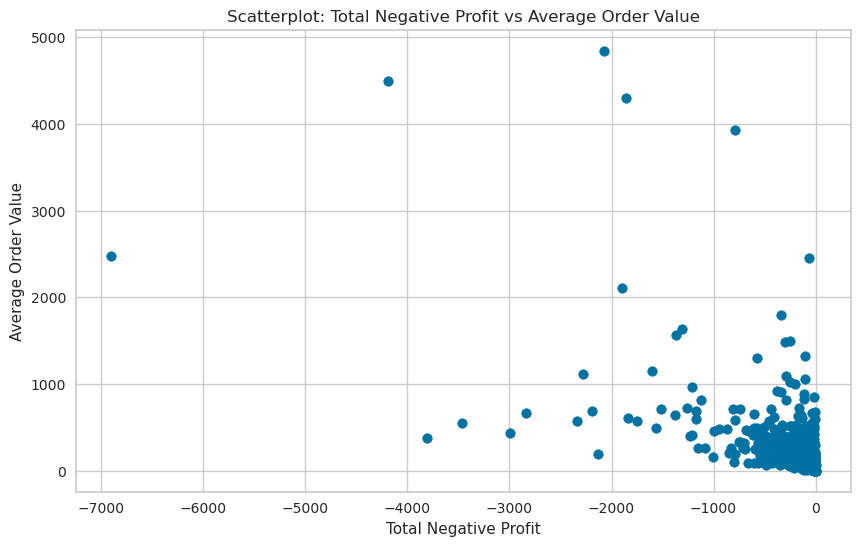

In [49]:
# Scatter plot between total negative profit and average order value
plt.figure(figsize=(10, 6))
plt.scatter(negative_profit_summary['total_negative_profit'], negative_profit_summary['average_order_value'])
plt.xlabel('Total Negative Profit')
plt.ylabel('Average Order Value')
plt.title('Scatterplot: Total Negative Profit vs Average Order Value')
plt.grid(True)
plt.show()


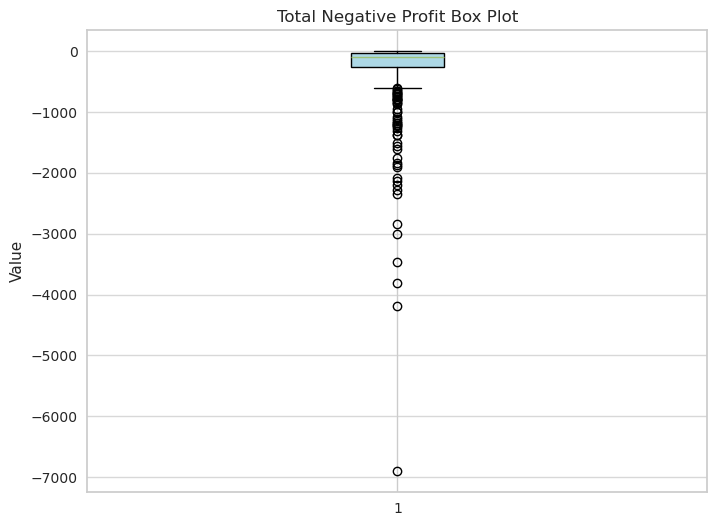

In [50]:
plt.figure(figsize=(8, 6))
plt.boxplot(negative_profit_summary['total_negative_profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Total Negative Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

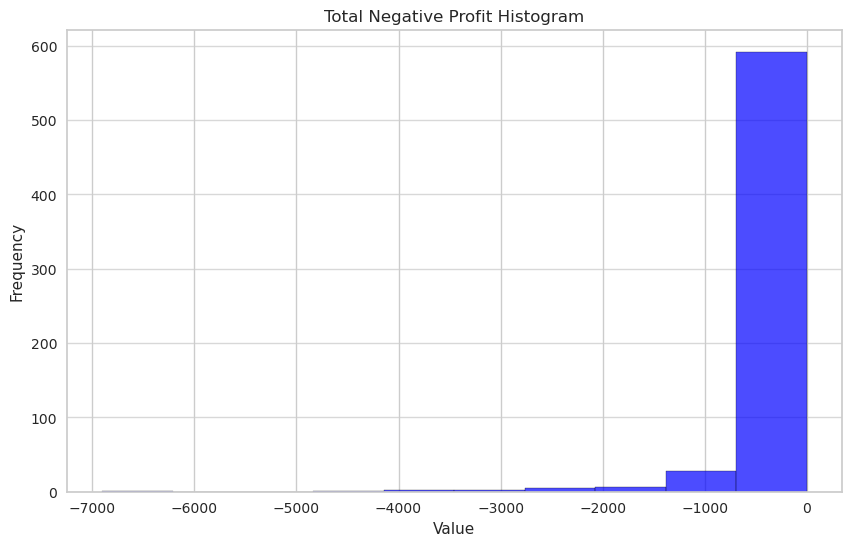

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(negative_profit_summary['total_negative_profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Total Negative Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()